In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import random, sys

In [29]:
paths = [['PV','X','MET'], ['PV','X','e+'],['PV','X','e-'],
         ['PV','Y','Z','W','MET'],['PV','Y','Z','W','L'],['PV','Y','Z','jetA'],['PV','Y','Z','jetB'],['PV','Y','mu-']]
g,root = nx.prefix_tree(paths)
g.remove_node(root)
for n in g.nodes():
    if g.out_degree[n] == 0:
        g.remove_node(n)
        break
labelsDict = {}
#Set labels for comparison
for n in g.nodes():
    labelsDict[n] = g.nodes[n]['source']

In [22]:
random.shuffle(paths)
gB,root = nx.prefix_tree(paths)
gB.remove_node(root)
for n in gB.nodes():
    if gB.out_degree[n] == 0:
        gB.remove_node(n)
        break

labelsDictB = {}
#Set labels for comparison
for n in gB.nodes():
    labelsDictB[n] = gB.nodes[n]['source']

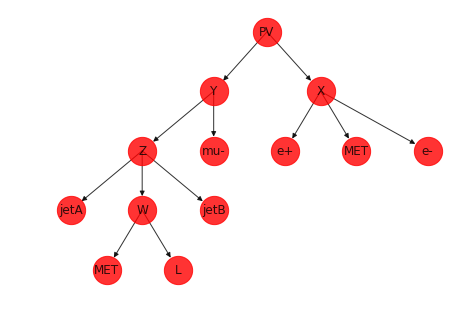

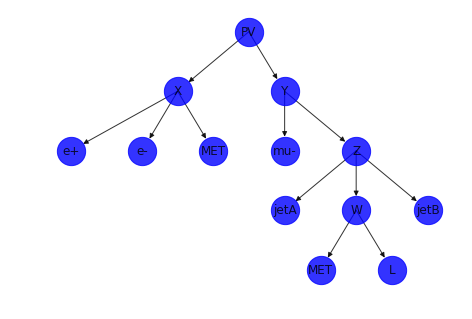

In [23]:
pos =graphviz_layout(g, prog='dot')
nx.draw(g,pos,with_labels=True,arrows=True,labels=labelsDict,node_size=800,alpha=0.8)
plt.show()
pos =graphviz_layout(gB, prog='dot')
nx.draw(gB,pos,with_labels=True,arrows=True,labels=labelsDictB,node_size=800,alpha=0.8,node_color='b')
plt.show()

In [5]:
def setTuples(g,node=None):
    
    if node is None:
        node = [n for n in g.nodes() if g.in_degree[n] == 0][0]
        for n in g.nodes():
            g.nodes[n]['tuple'] = []
           
    suc = list(g.successors(node))
    if not suc:
        g.nodes[node]['tuple'] = 10
    else:
        for n in suc:
            setTuples(g,n)
        tp = sorted([g.nodes[n]['tuple'] for n in suc])
        g.nodes[node]['tuple'] = int(str(tp).replace("'","").replace(",","").replace('[','1').replace(']','0').replace(" ",""))

        
        
def getCanonName(g,node=None):
    
    if node is None:
        node = [n for n in g.nodes() if g.in_degree[n] == 0][0]

    children = list(g[node])
    if not children:
        return 10
    else:
        tp = sorted([getCanon(g,n) for n in children])
        tpStr = '1'+"".join(str(c) for c in tp)+'0'
        return int(tpStr)

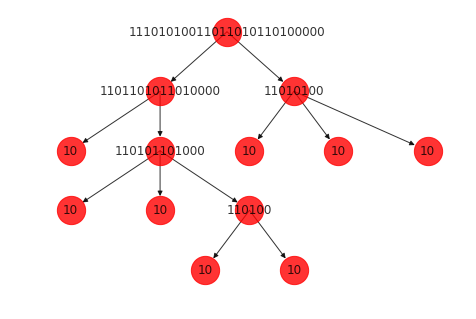

In [6]:
setTuples(g)
levelDict = dict([[n,g.nodes[n]['tuple']] for n in g.nodes()])
pos =graphviz_layout(g, prog='dot')
nx.draw(g,pos,with_labels=True,arrows=True,labels=levelDict,node_size=800,alpha=0.8)
plt.show()

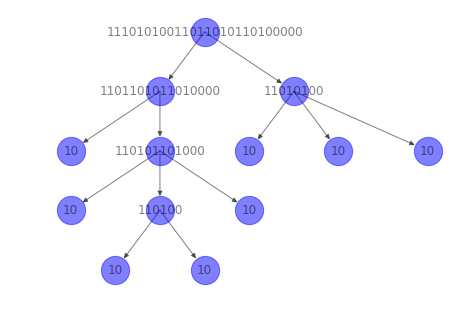

In [7]:
setTuples(gB)
levelDict = dict([[n,gB.nodes[n]['tuple']] for n in gB.nodes()])
pos =graphviz_layout(gB, prog='dot')
nx.draw(gB,pos,with_labels=True,arrows=True,labels=levelDict,node_size=800,alpha=0.5,node_color='b')
plt.show()

In [37]:
rootA = [n for n in g.nodes() if g.in_degree[n] == 0][0]
rootB = [n for n in gB.nodes() if gB.in_degree[n] == 0][0]

In [26]:
levelNodes = {}
for n in g.nodes():
    d = nx.shortest_path_length(g,rootA,n)
    if not d in levelNodes:
        levelNodes[d] = [g.nodes[n]['source']]
    else:
        levelNodes[d].append(g.nodes[n]['source'])
print(levelNodes)

{0: ['PV'], 1: ['Y', 'X'], 2: ['e+', 'MET', 'e-', 'Z', 'mu-'], 3: ['jetA', 'W', 'jetB'], 4: ['MET', 'L']}


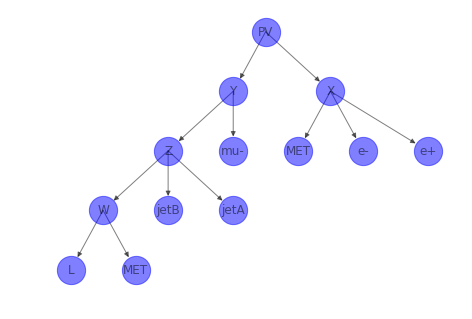

In [30]:
pos =graphviz_layout(g, prog='dot')
nx.draw(g,pos,with_labels=True,arrows=True,node_size=800,alpha=0.5,node_color='b',labels=labelsDict)
plt.show()

In [38]:
for node,succ in nx.bfs_successors(g,rootA):
    print(node,succ)

87a435e5-e6cf-11e8-9547-f4ec389951e9 ['87a435e6-e6cf-11e8-9547-f4ec389951e9', '87a435ee-e6cf-11e8-9547-f4ec389951e9']
87a435e6-e6cf-11e8-9547-f4ec389951e9 ['87a435e8-e6cf-11e8-9547-f4ec389951e9', '87a435e7-e6cf-11e8-9547-f4ec389951e9']
87a435ee-e6cf-11e8-9547-f4ec389951e9 ['87a435ef-e6cf-11e8-9547-f4ec389951e9', '87a435f1-e6cf-11e8-9547-f4ec389951e9', '87a435f0-e6cf-11e8-9547-f4ec389951e9']
87a435e8-e6cf-11e8-9547-f4ec389951e9 ['87a435eb-e6cf-11e8-9547-f4ec389951e9', '87a435e9-e6cf-11e8-9547-f4ec389951e9', '87a435ea-e6cf-11e8-9547-f4ec389951e9']
87a435eb-e6cf-11e8-9547-f4ec389951e9 ['87a435ed-e6cf-11e8-9547-f4ec389951e9', '87a435ec-e6cf-11e8-9547-f4ec389951e9']


In [34]:
x = [1,2,3]
y = [1,2,3]
print((x > y) - (x < y))

0
